In [68]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns

def run_cpp_matrix_generator(L, P, Inh, matrix_type):
    compile_command = "g++ -O3 Matrix_conect.cpp Matrices_generador.cpp -o matrix_generator"
    subprocess.run(compile_command, shell=True, check=True)
    # Ejecuta el ejecutable de C++
    result = subprocess.run(['./matrix_generator', str(L), str(P), str(Inh), matrix_type],
                            stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    if result.returncode != 0:
        print("Error:", result.stderr)
        return None
    
    # Procesa la salida del programa C++
    matrix_str = result.stdout.strip().split('\n')
    matrix = [list(map(int, row.split())) for row in matrix_str]
    
    return np.array(matrix)

def save_matrix_to_file(matrix, filename):
    np.savetxt(filename, matrix, fmt='%d')

#{'L': 49, 'P': 0.18480288512056137, 'Inh': 0.3568274238758705, 'Trest': 0.001388460705036468, 'Trelative': 0.1037062403200316, 'C_h': 0.8657675703460452, 'Tipo_red': 1}
L = 49  # Tamaño de la matriz
P = 0.18480288512056137 # Probabilidad
Inh = 0.3568274238758705  # Umbral de inhibición

# Generar y guardar las matrices
matrix_types = ['regular', 'small_word_uni', 'small_word_Bi', 'random_bi', 'random_uni']

for m_type in matrix_types:
    matrix = run_cpp_matrix_generator(L, P, Inh, m_type)
    if matrix is not None:
        filename = f'Matrices/{m_type}_matrix.txt'
        save_matrix_to_file(matrix, filename)
        print(f'Matriz {m_type} guardada en {filename}')


Matriz regular guardada en Matrices/regular_matrix.txt
Matriz small_word_uni guardada en Matrices/small_word_uni_matrix.txt
Matriz small_word_Bi guardada en Matrices/small_word_Bi_matrix.txt
Matriz random_bi guardada en Matrices/random_bi_matrix.txt
Matriz random_uni guardada en Matrices/random_uni_matrix.txt


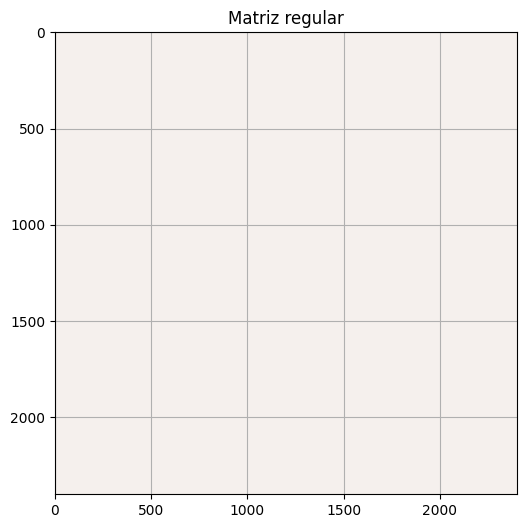

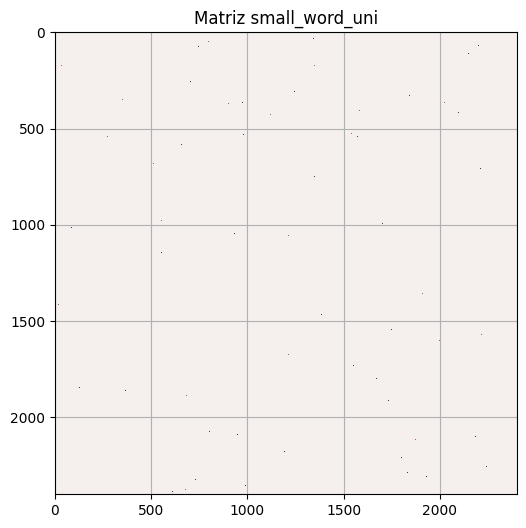

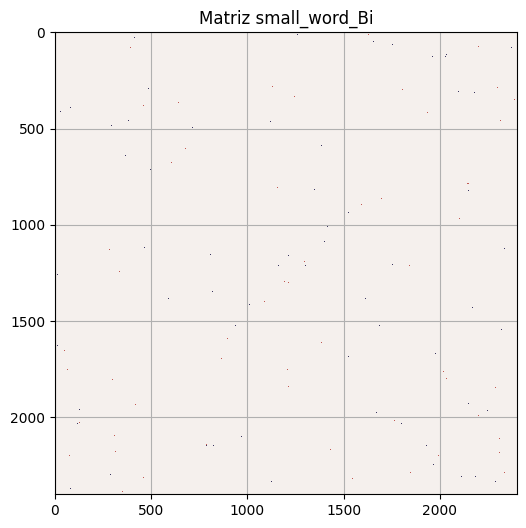

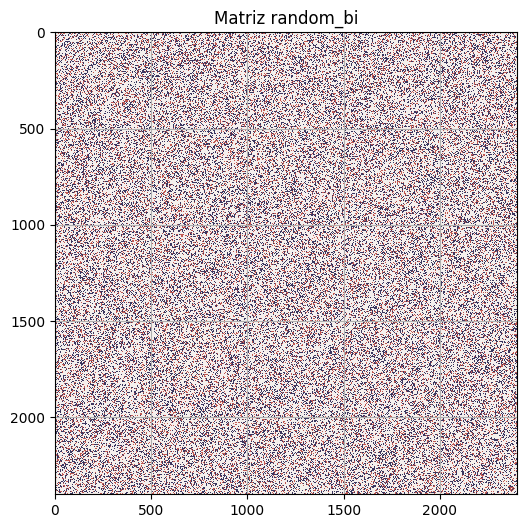

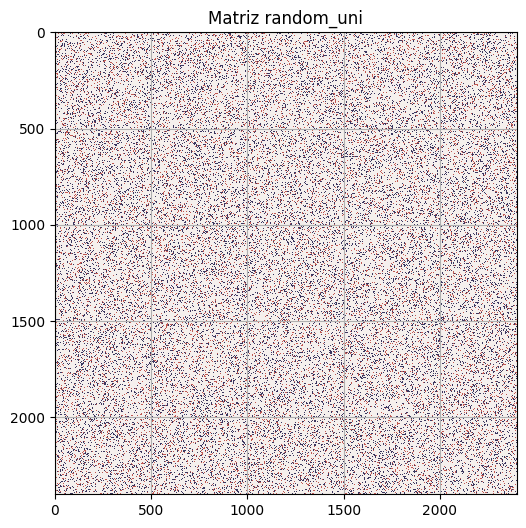

In [69]:

def plot_matrix(matrix, title):
    estado_colores = ['#3b365f', '#f5f0ed', '#c05953']  # Rojo, verde, azul (puedes elegir otros)
    cmap = mcolors.ListedColormap(estado_colores)
    
    plt.figure(figsize=(6,6))
    plt.imshow(matrix, cmap=cmap, interpolation='nearest')
    plt.title(title)
    #plt.colorbar()
    plt.grid()
    plt.show()

# Imprimir y graficar las matrices
for m_type in matrix_types:
    filename = f'Matrices/{m_type}_matrix.txt'
    matrix = np.loadtxt(filename, dtype=int)
    plot_matrix(matrix, f'Matriz {m_type}')



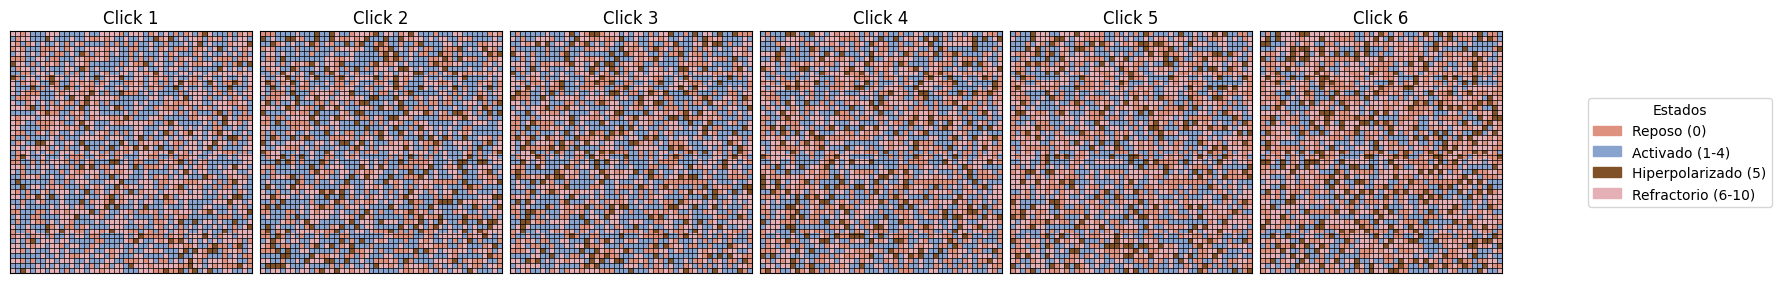

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Colores asignados a cada valor específico de 0 a 10
estado_colores = ["#de917f", '#88a3ce', '#88a3ce', '#88a3ce', '#88a3ce', '#805126', "#e4b0b6", "#e4b0b6", "#e4b0b6", "#e4b0b6", "#e4b0b6"]

# Definir los nombres de los estados
estado_nombres = ["Reposo", "Activado", "Hiperpolarizado", "Refractorio"]

# Crear el colormap y normalización
cmap = mcolors.ListedColormap(estado_colores)
bounds = np.arange(len(estado_colores) + 1) - 0.5
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Lista de archivos de la malla en orden de tiempo
archivos = sorted(glob.glob("Mallas/Malla_a_*.txt"))  # Ajusta la ruta

# Crear una figura con múltiples subplots en una fila
fig, axes = plt.subplots(1, len(archivos), figsize=(15, 5), constrained_layout=True)

# Iterar sobre cada archivo y cargar la malla para graficarla en su respectivo subplot
for i, archivo in enumerate(archivos):
    malla = np.loadtxt(archivo, dtype=int)
    ax = axes[i]
    cax = ax.imshow(malla, cmap=cmap, norm=norm, interpolation='nearest')

    # Configurar cada subplot
    ax.set_title(f"Click {i+1}")
    ax.set_xticks(np.arange(-0.5, malla.shape[1], 1), minor=False)
    ax.set_yticks(np.arange(-0.5, malla.shape[0], 1), minor=False)
    ax.grid(color="black", linestyle='-', linewidth=0.5)
    ax.tick_params(size=0)

    # Ocultar los números de los ejes
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Crear la leyenda manualmente y colocarla a la derecha
# Los colores en la leyenda representan los rangos de valores asociados con cada estado
patches = [
    mpatches.Patch(color="#de917f", label="Reposo (0)"),
    mpatches.Patch(color="#88a3ce", label="Activado (1-4)"),
    mpatches.Patch(color="#805126", label="Hiperpolarizado (5)"),
    mpatches.Patch(color="#e4b0b6", label="Refractorio (6-10)")
]
fig.legend(handles=patches, title="Estados", bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.show()


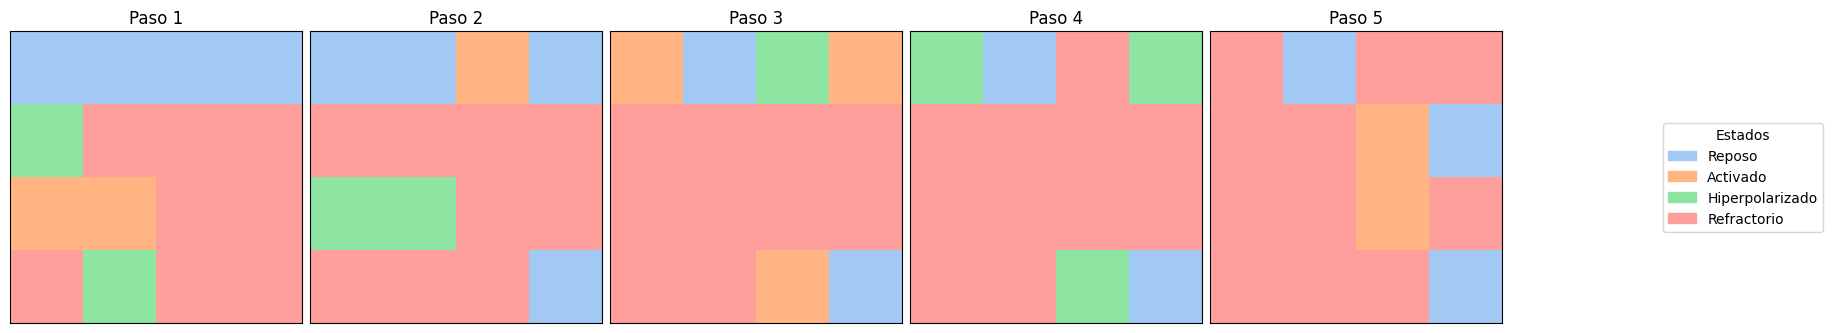

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import seaborn as sns

# Colores estilo 'vivid' o 'pastel' de seaborn
estado_colores = sns.color_palette("pastel", 4)  # Cambia a "bright" para colores vívidos

# Definir los estados y asignar valores únicos
estado_nombres = ["Reposo", "Activado", "Hiperpolarizado", "Refractorio"]
estado_valores = [0, 1, 2, 3]  # Valores únicos para cada estado

# Crear el colormap y normalización
cmap = mcolors.ListedColormap(estado_colores)
bounds = np.arange(len(estado_nombres) + 1) - 0.5
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Lista de archivos de la malla en orden de tiempo
archivos = sorted(glob.glob("Mallas/Malla_0_*.txt"))  # Ajusta la ruta

# Crear una figura con múltiples subplots en una fila
fig, axes = plt.subplots(1, len(archivos), figsize=(15, 5), constrained_layout=True)

# Iterar sobre cada archivo y cargar la malla para graficarla en su respectivo subplot
for i, archivo in enumerate(archivos):
    malla = np.loadtxt(archivo)
    ax = axes[i]
    cax = ax.imshow(malla, cmap=cmap, norm=norm, interpolation='nearest')
    
    # Configurar cada subplot
    ax.set_title(f"Paso {i+1}")
    ax.set_xticks(np.arange(-0.5, malla.shape[1], 1), minor=False)
    ax.set_yticks(np.arange(-0.5, malla.shape[0], 1), minor=False)
    ax.grid( color="black", linestyle='-', linewidth=0.5)
    ax.tick_params(which="minor", size=0)
    
# Crear la leyenda manualmente
patches = [mpatches.Patch(color=estado_colores[i], label=estado_nombres[i]) for i in range(len(estado_nombres))]
fig.legend(handles=patches, title="Estados", bbox_to_anchor=(1.05, 1), loc="center")
plt.show()
